# Домашняя работа №2

In [2]:
# 2.3.1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data/S02-hw-dataset.csv')
data.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [3]:
data.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [5]:
# 2.3.2

data.isna().mean() # В возрасте 5% пропусков

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [7]:
data.duplicated().sum() # 1 полностью дублирующая строка

1

In [8]:
data.index[data.duplicated() == True].tolist() # 40 строка полностью дублируется

[40]

In [11]:
data[data.purchases < 0] # человек с -1 покупкой

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [12]:
data[data.age > 100] # человек, которому 120 лет, тот же самый

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [15]:
data[data.revenue == 0][data.purchases > 0] # 4 покупки, 0 дохода

C:\Users\User\AppData\Local\Temp\ipykernel_24452\2333540896.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.revenue == 0][data.purchases > 0]


,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


В данном датасете обнаружилась 1 строка (40), которая полностью дублирует другую строку из датасета.

Также, 5% значений из признака "age" пропущено, есть ошибка в строке 5 (возраст 120 лет, -1 покупка) и ошибка в 10 строке (0 доход при 4 покупках)

In [17]:
# 2.3.3

data['country'].value_counts ()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [22]:
data.groupby(['country']).mean() # группировка по стране

,user_id,age,purchases,revenue
country,,,,
CN,10.000000,24.000000,4.500000,1054.000000
DE,24.666667,34.600000,6.500000,1445.500000
FR,20.666667,46.250000,4.250000,675.916667
RU,18.076923,30.076923,4.769231,790.076923
US,22.375000,36.714286,4.625000,557.375000


In [31]:
data.groupby(['country']).sum()

,user_id,age,purchases,revenue
country,,,,
CN,20,48.0,9,2108
DE,148,173.0,39,8673
FR,248,555.0,51,8111
RU,235,391.0,62,10271
US,179,257.0,37,4459


Больше всего покупателей из россии, меньше всего из Китая. 

Больше всего оставляли денег покупатели из Германии, меньше всего из США.
Хотя больше всего покупали Россияне.

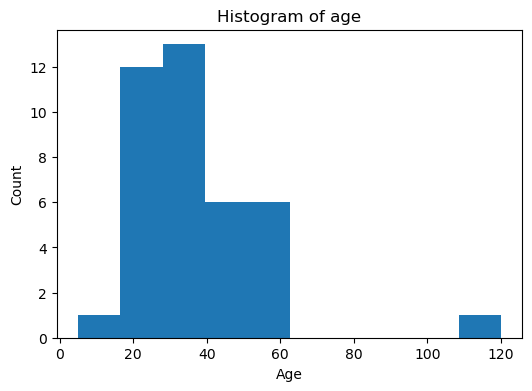

In [32]:
# 2.4

# 2.3.2 — Гистограмма (age)
plt.figure(figsize=(6,4))
plt.hist(data['age'], bins=10)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Histogram of age")
plt.show()


<Figure size 600x400 with 0 Axes>

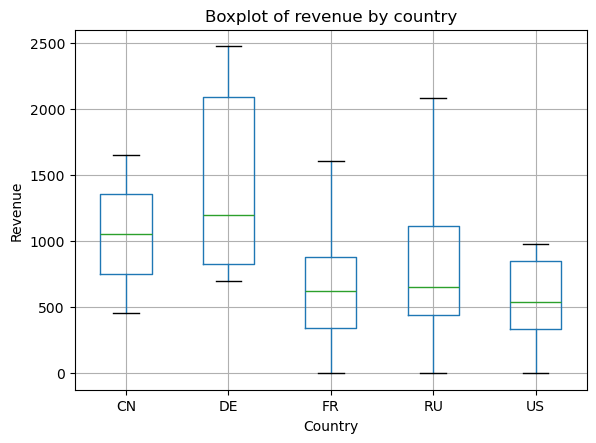

In [33]:
# 2.3.3 — Boxplot (revenue по country)
plt.figure(figsize=(6,4))
data.boxplot(column='revenue', by='country')
plt.title("Boxplot дохода по стране")
plt.suptitle("") 
plt.xlabel("Страна")
plt.ylabel("Доход")
plt.show()


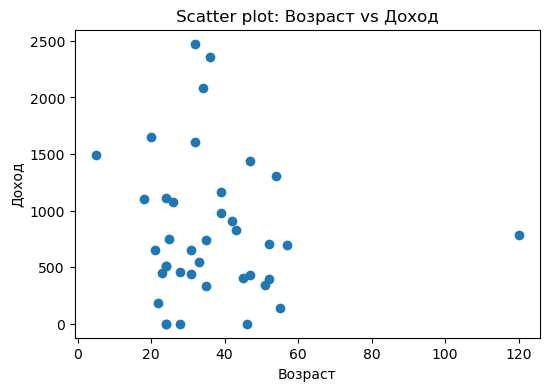

In [40]:
# 2.3.4 — Scatter plot (age vs revenue)
plt.figure(figsize=(6,4))
plt.scatter(data['age'], data['revenue'])
plt.xlabel("Возраст")
plt.ylabel("Доход")
plt.title("Scatter plot: Возраст vs Доход")
plt.savefig("figures/scatterplot.png")
plt.show()
plt.close()
